In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from lazygrad import MLP, Value
import pandas as pd
import edamame as eda 
%matplotlib inline
np.random.seed(1337)
random.seed(1337)

### Dataset 

[link for the data](https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction?resource=download)

In [2]:
df_x = pd.read_csv("data/x.csv", sep=";")
print(df_x.shape)
df_x.head()

(414, 6)


,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,-0.823683,1.255628,-0.792495,2.007407,1.125430,0.448762
1,-0.823683,0.157086,-0.616612,1.667503,0.912444,0.401139
2,1.541151,-0.387791,-0.414015,0.307885,1.486860,0.688183
3,1.246435,-0.387791,-0.414015,0.307885,1.486860,0.688183
4,-1.121951,-1.117223,-0.549997,0.307885,0.834188,0.592937


In [3]:
# convert pandas dataframe to numpy
x = df_x.to_numpy()
print(x.shape)

(414, 6)


In [8]:
df_y = pd.read_csv("data/y.csv", sep=";")
y = np.log(df_y.to_numpy().squeeze())
print(y.shape)

(414,)


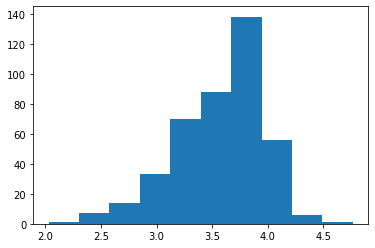

In [9]:
plt.hist(y)
plt.show()

### Model

In [10]:
# initialize a model 
model = MLP(6, [16, 1]) # 2-layer neural network
print(model)
print("number of parameters", len(model.parameters()))

MLP of [Layer of [ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6), ReLUNeuron(6)], Layer of [LinearNeuron(16)]]
number of parameters 129
